In [1]:
import matplotlib.pyplot as plt
import hipercam as hcam
import numpy as np
from astropy import time, coordinates as coord, units as u
from astropy.coordinates import EarthLocation, AltAz

In [2]:
#funcs
def y_to_flux(y,ye,te):
    flux = y/(te*86400)
    flux_err = ye/(te*86400)
    flux_std_err = np.mean(flux_err) / np.sqrt(len(flux_err))
    return flux , flux_err , flux_std_err


def flux_to_mag(flux, error):
    mag = -1 * 2.5*np.log10(flux)
    mag_err = (2.5 / np.log(10)) * (error/flux)
    return mag, mag_err


def mag_to_flux(mag):
    flux = 10**(-0.4 * mag)
    return flux


def magAB_to_flux(mag):
    ABflux = 10**(-0.4 * (mag-8.90))
    
    return ABflux
def magAB_to_flux(mag):
    ABflux = 10**(-0.4 * (mag-8.90))
    #ABflux_err = mag_err * (np.log(10) / 2.5) * ABflux
    return ABflux

def flux_to_ABmag(flux):
    ABmag = -2.5 * np.log10(flux) + 8.90
    #ABmagErr = (flux_err/flux) * (2.5 / np.log(10))
    return ABmag


def airmass(target_coords,times):
    """
    Returns target airmass given an array of astropy times and the target position.
    """

    frame = AltAz(obstime=times, location=tel_location)
    altazs = target_coords.transform_to(frame)
    airmasses = altazs.secz
    return airmasses
def calculate_phase(bmjd,reference_epoch,period):
    
    phase = ((bmjd - reference_epoch) / period) % 1
    # Shift phases near 1 to negative values
    return np.where(phase < 0.9, phase, phase - 1)





reference_epoch =55641.43601610334
period = 0.24613528148209396



In [3]:

#scipath =r'/home/pha19jgb/Science_Runs/2024_04_30/hlog2_17_01.log'#2024_04_30 log
scipath =r'/home/pha19jgb/Science_Runs/2024_04_30/26.11/SGReduce.log'#log1 and log are getting very close to decently okay reductions
#scipath =r'/home/pha19jgb/Science_Runs/2024_04_30/26.11/u_fixed_19_02.log'



sci_date = scipath.split('/')[-2]

scilog = hcam.hlog.Hlog.rascii(scipath)
tel_location = EarthLocation.of_site('Roque de los Muchachos, La Palma')
obj = coord.SkyCoord("17:17:17.0","+67:57:04",unit=(u.hourangle, u.deg), frame='icrs')

In [4]:
#Extracting the infomation from the log as a time series, ("CCD","Aperture")

sci_u = scilog.tseries("1","1")
sci_g = scilog.tseries("2","1")
sci_r = scilog.tseries("3","1")
sci_i = scilog.tseries("4","1")
sci_z = scilog.tseries("5","1")

g_ye = sci_g.ye

In [5]:
#Extracing the same infomation but for the COMPO star

comp_u = scilog.tseries("1","2")
#comp_u = scilog.tseries('1','3') + scilog.tseries('1','4')
ind_u1 = scilog.tseries("1","3")
ind_u2 = scilog.tseries("1","4")

comp_g = scilog.tseries("2","3") + scilog.tseries('2','4') 
#comp_g = scilog.tseries("1","2")
ind_g1 = scilog.tseries("2","3")
ind_g2 = scilog.tseries("2","4")

comp_r = scilog.tseries("3","3") + scilog.tseries('3','4')
#comp_r = scilog.tseries("1","2")
ind_r1 = scilog.tseries("3","3")
ind_r2 = scilog.tseries("3","4")

comp_i = scilog.tseries("4","3") + scilog.tseries('4','4')
#comp_i = scilog.tseries("1","2")
ind_i1 = scilog.tseries("4","3")
ind_i2 = scilog.tseries("4","4")


comp_z = scilog.tseries("5","3") +  scilog.tseries('5','4')
#comp_z = scilog.tseries("1","2")
ind_z1 = scilog.tseries("5","3")
ind_z2 = scilog.tseries("5","4")



In [6]:
#Reading the middle time of exposures from pings to a GPS satellite in MJD+UTC, needs to have barycentric corrections performed as the earth moves 

obstime_u_t = time.Time(sci_u.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_g_t = time.Time(sci_g.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_r_t = time.Time(sci_r.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_i_t = time.Time(sci_i.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_z_t = time.Time(sci_z.t, format = 'mjd' , scale = 'utc', location = tel_location)

#Now with COMPO

obstime_u_c = time.Time(comp_u.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_g_c = time.Time(comp_g.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_r_c = time.Time(comp_r.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_i_c = time.Time(comp_i.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_z_c = time.Time(comp_z.t, format = 'mjd' , scale = 'utc', location = tel_location)

In [7]:
#Barycentric (Solar System (double check) COM) correction built into astropy.Time

barydelta_u_t = obstime_u_t.light_travel_time(obj)
barydelta_g_t = obstime_g_t.light_travel_time(obj)
barydelta_r_t = obstime_r_t.light_travel_time(obj) 
barydelta_i_t = obstime_i_t.light_travel_time(obj) 
barydelta_z_t = obstime_z_t.light_travel_time(obj) 

#now with COMPO

barydelta_u_c = obstime_u_c.light_travel_time(obj)
barydelta_g_c = obstime_g_c.light_travel_time(obj)
barydelta_r_c = obstime_r_c.light_travel_time(obj) 
barydelta_i_c = obstime_i_c.light_travel_time(obj) 
barydelta_z_c = obstime_z_c.light_travel_time(obj) 

In [8]:
#Applying Barycentric correction

baryobs_u_t = (obstime_u_t.tdb + barydelta_u_t).value 
baryobs_g_t = (obstime_g_t.tdb + barydelta_g_t).value 
baryobs_r_t = (obstime_r_t.tdb + barydelta_r_t).value 
baryobs_i_t = (obstime_i_t.tdb + barydelta_i_t).value 
baryobs_z_t = (obstime_z_t.tdb + barydelta_z_t).value 

#now with COMPO

baryobs_u_c = (obstime_u_c.tdb + barydelta_u_c).value
baryobs_g_c = (obstime_g_c.tdb + barydelta_g_c).value
baryobs_r_c = (obstime_r_c.tdb + barydelta_r_c).value
baryobs_i_c = (obstime_i_c.tdb + barydelta_i_c).value
baryobs_z_c = (obstime_z_c.tdb + barydelta_z_c).value

In [9]:
ratio_u = np.array(sci_u.y / comp_u.y )



ratio_g = np.array(sci_g.y / comp_g.y)
ratio_r = np.array(sci_r.y / comp_r.y)
ratio_i = np.array(sci_i.y / comp_i.y)
ratio_z = np.array(sci_z.y / comp_z.y)

In [10]:
#now to transfer into magnitudes for the science target, #assuming .y is flux

#Sci Targ
sci_flux_u , sci_flux_u_err, sci_flux_u_std_err  = y_to_flux(sci_u.y , sci_u.ye, sci_u.te)
sci_flux_g , sci_flux_g_err, sci_flux_g_std_err  = y_to_flux(sci_g.y , sci_g.ye, sci_g.te)
sci_flux_r , sci_flux_r_err, sci_flux_r_std_err  = y_to_flux(sci_r.y , sci_r.ye, sci_r.te)
sci_flux_i , sci_flux_i_err, sci_flux_i_std_err  = y_to_flux(sci_i.y , sci_i.ye, sci_i.te)
sci_flux_z , sci_flux_z_err, sci_flux_z_std_err  = y_to_flux(sci_z.y , sci_z.ye, sci_z.te)

sci_mag_u , sci_mag_u_err = flux_to_mag(sci_flux_u,sci_flux_u_err)
sci_mag_g , sci_mag_g_err = flux_to_mag(sci_flux_g,sci_flux_g_err)
sci_mag_r , sci_mag_r_err = flux_to_mag(sci_flux_r,sci_flux_r_err)
sci_mag_i , sci_mag_i_err = flux_to_mag(sci_flux_i,sci_flux_i_err)
sci_mag_z , sci_mag_z_err = flux_to_mag(sci_flux_z,sci_flux_z_err)

#Sci Comp
comp_flux_u , comp_flux_u_err, comp_flux_u_std_err = y_to_flux(comp_u.y,comp_u.ye,comp_u.te)
comp_flux_g , comp_flux_g_err, comp_flux_g_std_err = y_to_flux(comp_g.y,comp_g.ye,comp_g.te)
comp_flux_r , comp_flux_r_err, comp_flux_r_std_err = y_to_flux(comp_r.y,comp_r.ye,comp_r.te)
comp_flux_i , comp_flux_i_err, comp_flux_i_std_err = y_to_flux(comp_i.y,comp_i.ye,comp_i.te)
comp_flux_z , comp_flux_z_err, comp_flux_z_std_err = y_to_flux(comp_z.y,comp_z.ye,comp_z.te)

comp_mag_u , comp_mag_u_err = flux_to_mag(comp_flux_u,comp_flux_u_err)
comp_mag_g , comp_mag_g_err = flux_to_mag(comp_flux_g,comp_flux_g_err)
comp_mag_r , comp_mag_r_err = flux_to_mag(comp_flux_r,comp_flux_r_err)
comp_mag_i , comp_mag_i_err = flux_to_mag(comp_flux_i,comp_flux_i_err)
comp_mag_z , comp_mag_z_err = flux_to_mag(comp_flux_z,comp_flux_z_err)

#also need Sci Airmasses
sci_airm_u = airmass(obj,obstime_u_t)
sci_airm_g = airmass(obj,obstime_g_t)
sci_airm_r = airmass(obj,obstime_r_t)
sci_airm_i = airmass(obj,obstime_i_t)
sci_airm_z = airmass(obj,obstime_z_t)


comp_airm_u = airmass(obj,obstime_u_c)
comp_airm_g = airmass(obj,obstime_g_c)
comp_airm_r = airmass(obj,obstime_r_c)
comp_airm_i = airmass(obj,obstime_i_c)
comp_airm_z = airmass(obj,obstime_z_c)


comp_flux_g1 , comp_flux_g_err1, comp_flux_g_std_err1 = y_to_flux(ind_g2.y,ind_g2.ye,ind_g2.te)
comp_mag_g1 , comp_mag_g_err1 = flux_to_mag(comp_flux_g1,comp_flux_g_err1)
print(sci_mag_g,comp_mag_g,comp_mag_g1)

[-15.388603 -15.388683 -15.386326 ... -15.356268 -15.367036 -15.365725] [-15.118852 -15.118865 -15.116624 ... -15.091029 -15.096354 -15.095893] [-14.184083 -14.185446 -14.184027 ... -14.157677 -14.157173 -14.158458]


In [11]:
ind1_flux_u , ind1_flux_u_err , ind1_flux_u_std = y_to_flux(ind_u1.y, ind_u1.ye, ind_u1.te) # counts to flux
ind2_flux_u , ind2_flux_u_err , ind2_flux_u_std = y_to_flux(ind_u2.y,ind_u2.ye,ind_u2.te)



ind1_mag_u , ind1_mag_u_err = flux_to_mag(ind1_flux_u,ind1_flux_u_err) # flux to mag
ind2_mag_u , ind2_mag_u_err = flux_to_mag(ind2_flux_u,ind2_flux_u_err)


#g bands first
ind1_flux_g , ind1_flux_g_err , ind1_flux_g_std = y_to_flux(ind_g1.y, ind_g1.ye, ind_g1.te) # counts to flux
ind2_flux_g , ind2_flux_g_err , ind2_flux_g_std = y_to_flux(ind_g2.y,ind_g2.ye,ind_g2.te)



ind1_mag_g , ind1_mag_g_err = flux_to_mag(ind1_flux_g,ind1_flux_g_err) # flux to mag
ind2_mag_g , ind2_mag_g_err = flux_to_mag(ind2_flux_g,ind2_flux_g_err)

#r bands
ind1_flux_r , ind1_flux_r_err , ind1_flux_r_err = y_to_flux(ind_r1.y,ind_r1.ye,ind_r1.te) # counts to flux
ind2_flux_r , ind2_flux_r_err , ind2_flux_r_err = y_to_flux(ind_r2.y,ind_r2.ye,ind_r2.te)

ind1_mag_r , ind1_mag_r_err = flux_to_mag(ind1_flux_r,ind1_flux_r_err) # flux to mag
ind2_mag_r , ind2_mag_r_err = flux_to_mag(ind2_flux_r,ind2_flux_r_err)

#i
ind1_flux_i , ind1_flux_i_err , ind1_flux_i_err = y_to_flux(ind_i1.y,ind_i1.ye,ind_i1.te)# counts to flux
ind2_flux_i , ind2_flux_i_err , ind2_flux_i_err = y_to_flux(ind_i2.y,ind_i2.ye,ind_i2.te)

ind1_mag_i , ind1_mag_i_err = flux_to_mag(ind1_flux_i,ind1_flux_i_err) # flux to mag
ind2_mag_i , ind2_mag_i_err = flux_to_mag(ind2_flux_i,ind2_flux_i_err)

#z
ind1_flux_z , ind1_flux_z_err , ind1_flux_z_err = y_to_flux(ind_z1.y,ind_z1.ye,ind_z1.te)# counts to flux
ind2_flux_z , ind2_flux_z_err , ind2_flux_z_err = y_to_flux(ind_z2.y,ind_z2.ye,ind_z2.te)

ind1_mag_z , ind1_mag_z_err = flux_to_mag(ind1_flux_z,ind1_flux_z_err) # flux to mag
ind2_mag_z , ind2_mag_z_err = flux_to_mag(ind2_flux_z,ind2_flux_z_err)

#testing airmasses:
obstime_ind1_u = time.Time(ind_u1.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind1u = obstime_ind1_u.light_travel_time(obj)
baryobs_ind1u = (obstime_ind1_u.tdb + barydelta_ind1u).value
ind1_airm_u = airmass(obj,obstime_ind1_u)

obstime_ind2_u = time.Time(ind_u2.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind2u = obstime_ind2_u.light_travel_time(obj)
baryobs_ind2u = (obstime_ind2_u.tdb + barydelta_ind1u).value
ind2_airm_u = airmass(obj,obstime_ind2_u)


obstime_ind1_g = time.Time(ind_g1.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind1g = obstime_ind1_g.light_travel_time(obj)
baryobs_ind1g = (obstime_ind1_g.tdb + barydelta_ind1g).value
ind1_airm_g = airmass(obj,obstime_ind1_g)

obstime_ind2_g = time.Time(ind_g2.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind2g = obstime_ind2_g.light_travel_time(obj)
baryobs_ind2g = (obstime_ind2_g.tdb + barydelta_ind1g).value
ind2_airm_g = airmass(obj,obstime_ind2_g)

obstime_ind1_r = time.Time(ind_r1.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind1r = obstime_ind1_r.light_travel_time(obj)
baryobs_ind1r = (obstime_ind1_r.tdb + barydelta_ind1r).value
ind1_airm_r = airmass(obj,obstime_ind1_r)

obstime_ind2_r = time.Time(ind_r2.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind2r = obstime_ind2_r.light_travel_time(obj)
baryobs_ind2r = (obstime_ind2_r.tdb + barydelta_ind1r).value
ind2_airm_r = airmass(obj,obstime_ind2_r)

obstime_ind1_i = time.Time(ind_i1.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind1i = obstime_ind1_i.light_travel_time(obj)
baryobs_ind1i = (obstime_ind1_i.tdb + barydelta_ind1i).value
ind1_airm_i = airmass(obj,obstime_ind1_i)

obstime_ind2_i = time.Time(ind_i2.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind2i = obstime_ind2_i.light_travel_time(obj)
baryobs_ind2i = (obstime_ind2_i.tdb + barydelta_ind1i).value
ind2_airm_i = airmass(obj,obstime_ind2_i)

obstime_ind1_z = time.Time(ind_z1.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind1z = obstime_ind1_z.light_travel_time(obj)
baryobs_ind1z = (obstime_ind1_z.tdb + barydelta_ind1z).value
ind1_airm_z = airmass(obj,obstime_ind1_z)

obstime_ind2_z = time.Time(ind_z2.t, format = 'mjd' , scale = 'utc', location = tel_location)
barydelta_ind2z = obstime_ind2_z.light_travel_time(obj)
baryobs_ind2z = (obstime_ind2_z.tdb + barydelta_ind1z).value
ind2_airm_z = airmass(obj,obstime_ind2_z)

Now dealing with the Extinction Coefficients



In [12]:
#extpath =r'/home/pha19jgb/Science_Runs/2024_04_30/FluxCal/airm_log.log'
#extpath =r'/home/pha19jgb/Science_Runs/2024_04_30/FluxCal/12.11/airm18_test.log'
extpath =r'/home/pha19jgb/Science_Runs/2024_04_30/FluxCal/12.11/airm_11_02.log'
ext_date = extpath.split('/')[-2]

extlog = hcam.hlog.Hlog.rascii(extpath)
tel_location = EarthLocation.of_site('Roque de los Muchachos, La Palma')
#ext = coord.SkyCoord("18:28:47.0","+23:07:32",unit=(u.hourangle, u.deg), frame='icrs') #run14
ext = coord.SkyCoord("21:16:03.0","+24:45:52",unit=(u.hourangle, u.deg), frame='icrs') #run18



In [13]:
airm_u = extlog.tseries("1","1")
airm_g = extlog.tseries("2","1")
airm_r = extlog.tseries("3","1")
airm_i = extlog.tseries("4","1")
airm_z = extlog.tseries("5","1")

obstime_u_airm = time.Time(airm_u.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_g_airm = time.Time(airm_g.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_r_airm = time.Time(airm_r.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_i_airm = time.Time(airm_i.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_z_airm = time.Time(airm_z.t, format = 'mjd' , scale = 'utc', location = tel_location)

barydelta_u_airm = obstime_u_airm.light_travel_time(ext)
barydelta_g_airm = obstime_g_airm.light_travel_time(ext)
barydelta_r_airm = obstime_r_airm.light_travel_time(ext) 
barydelta_i_airm = obstime_i_airm.light_travel_time(ext) 
barydelta_z_airm = obstime_z_airm.light_travel_time(ext)

baryobs_u_airm = (obstime_u_airm.tdb + barydelta_u_airm).value
baryobs_g_airm = (obstime_g_airm.tdb + barydelta_g_airm).value
baryobs_r_airm = (obstime_r_airm.tdb + barydelta_r_airm).value
baryobs_i_airm = (obstime_i_airm.tdb + barydelta_i_airm).value
baryobs_z_airm = (obstime_z_airm.tdb + barydelta_z_airm).value

airm_flux_u , airm_flux_u_err, airm_flux_u_std_err  = y_to_flux(airm_u.y , airm_u.ye, airm_u.te)
airm_flux_g , airm_flux_g_err, airm_flux_g_std_err  = y_to_flux(airm_g.y , airm_g.ye, airm_g.te)
airm_flux_r , airm_flux_r_err, airm_flux_r_std_err  = y_to_flux(airm_r.y , airm_r.ye, airm_r.te)
airm_flux_i , airm_flux_i_err, airm_flux_i_std_err  = y_to_flux(airm_i.y , airm_i.ye, airm_i.te)
airm_flux_z , airm_flux_z_err, airm_flux_z_std_err  = y_to_flux(airm_z.y , airm_z.ye, airm_z.te)

airm_mag_u , airm_mag_u_err = flux_to_mag(airm_flux_u,airm_flux_u_err)
airm_mag_g , airm_mag_g_err = flux_to_mag(airm_flux_g,airm_flux_g_err)
airm_mag_r , airm_mag_r_err = flux_to_mag(airm_flux_r,airm_flux_r_err)
airm_mag_i , airm_mag_i_err = flux_to_mag(airm_flux_i,airm_flux_i_err)
airm_mag_z , airm_mag_z_err = flux_to_mag(airm_flux_z,airm_flux_z_err)

airm_am_u = airmass(ext,obstime_u_airm)
airm_am_g = airmass(ext,obstime_g_airm)
airm_am_r = airmass(ext,obstime_r_airm)
airm_am_i = airmass(ext,obstime_i_airm)
airm_am_z = airmass(ext,obstime_z_airm)


y = 0.59x + -6.51
y = 0.14x + -9.35
y = 0.08x + -9.65
y = 0.05x + -9.59
y = 0.07x + -9.39


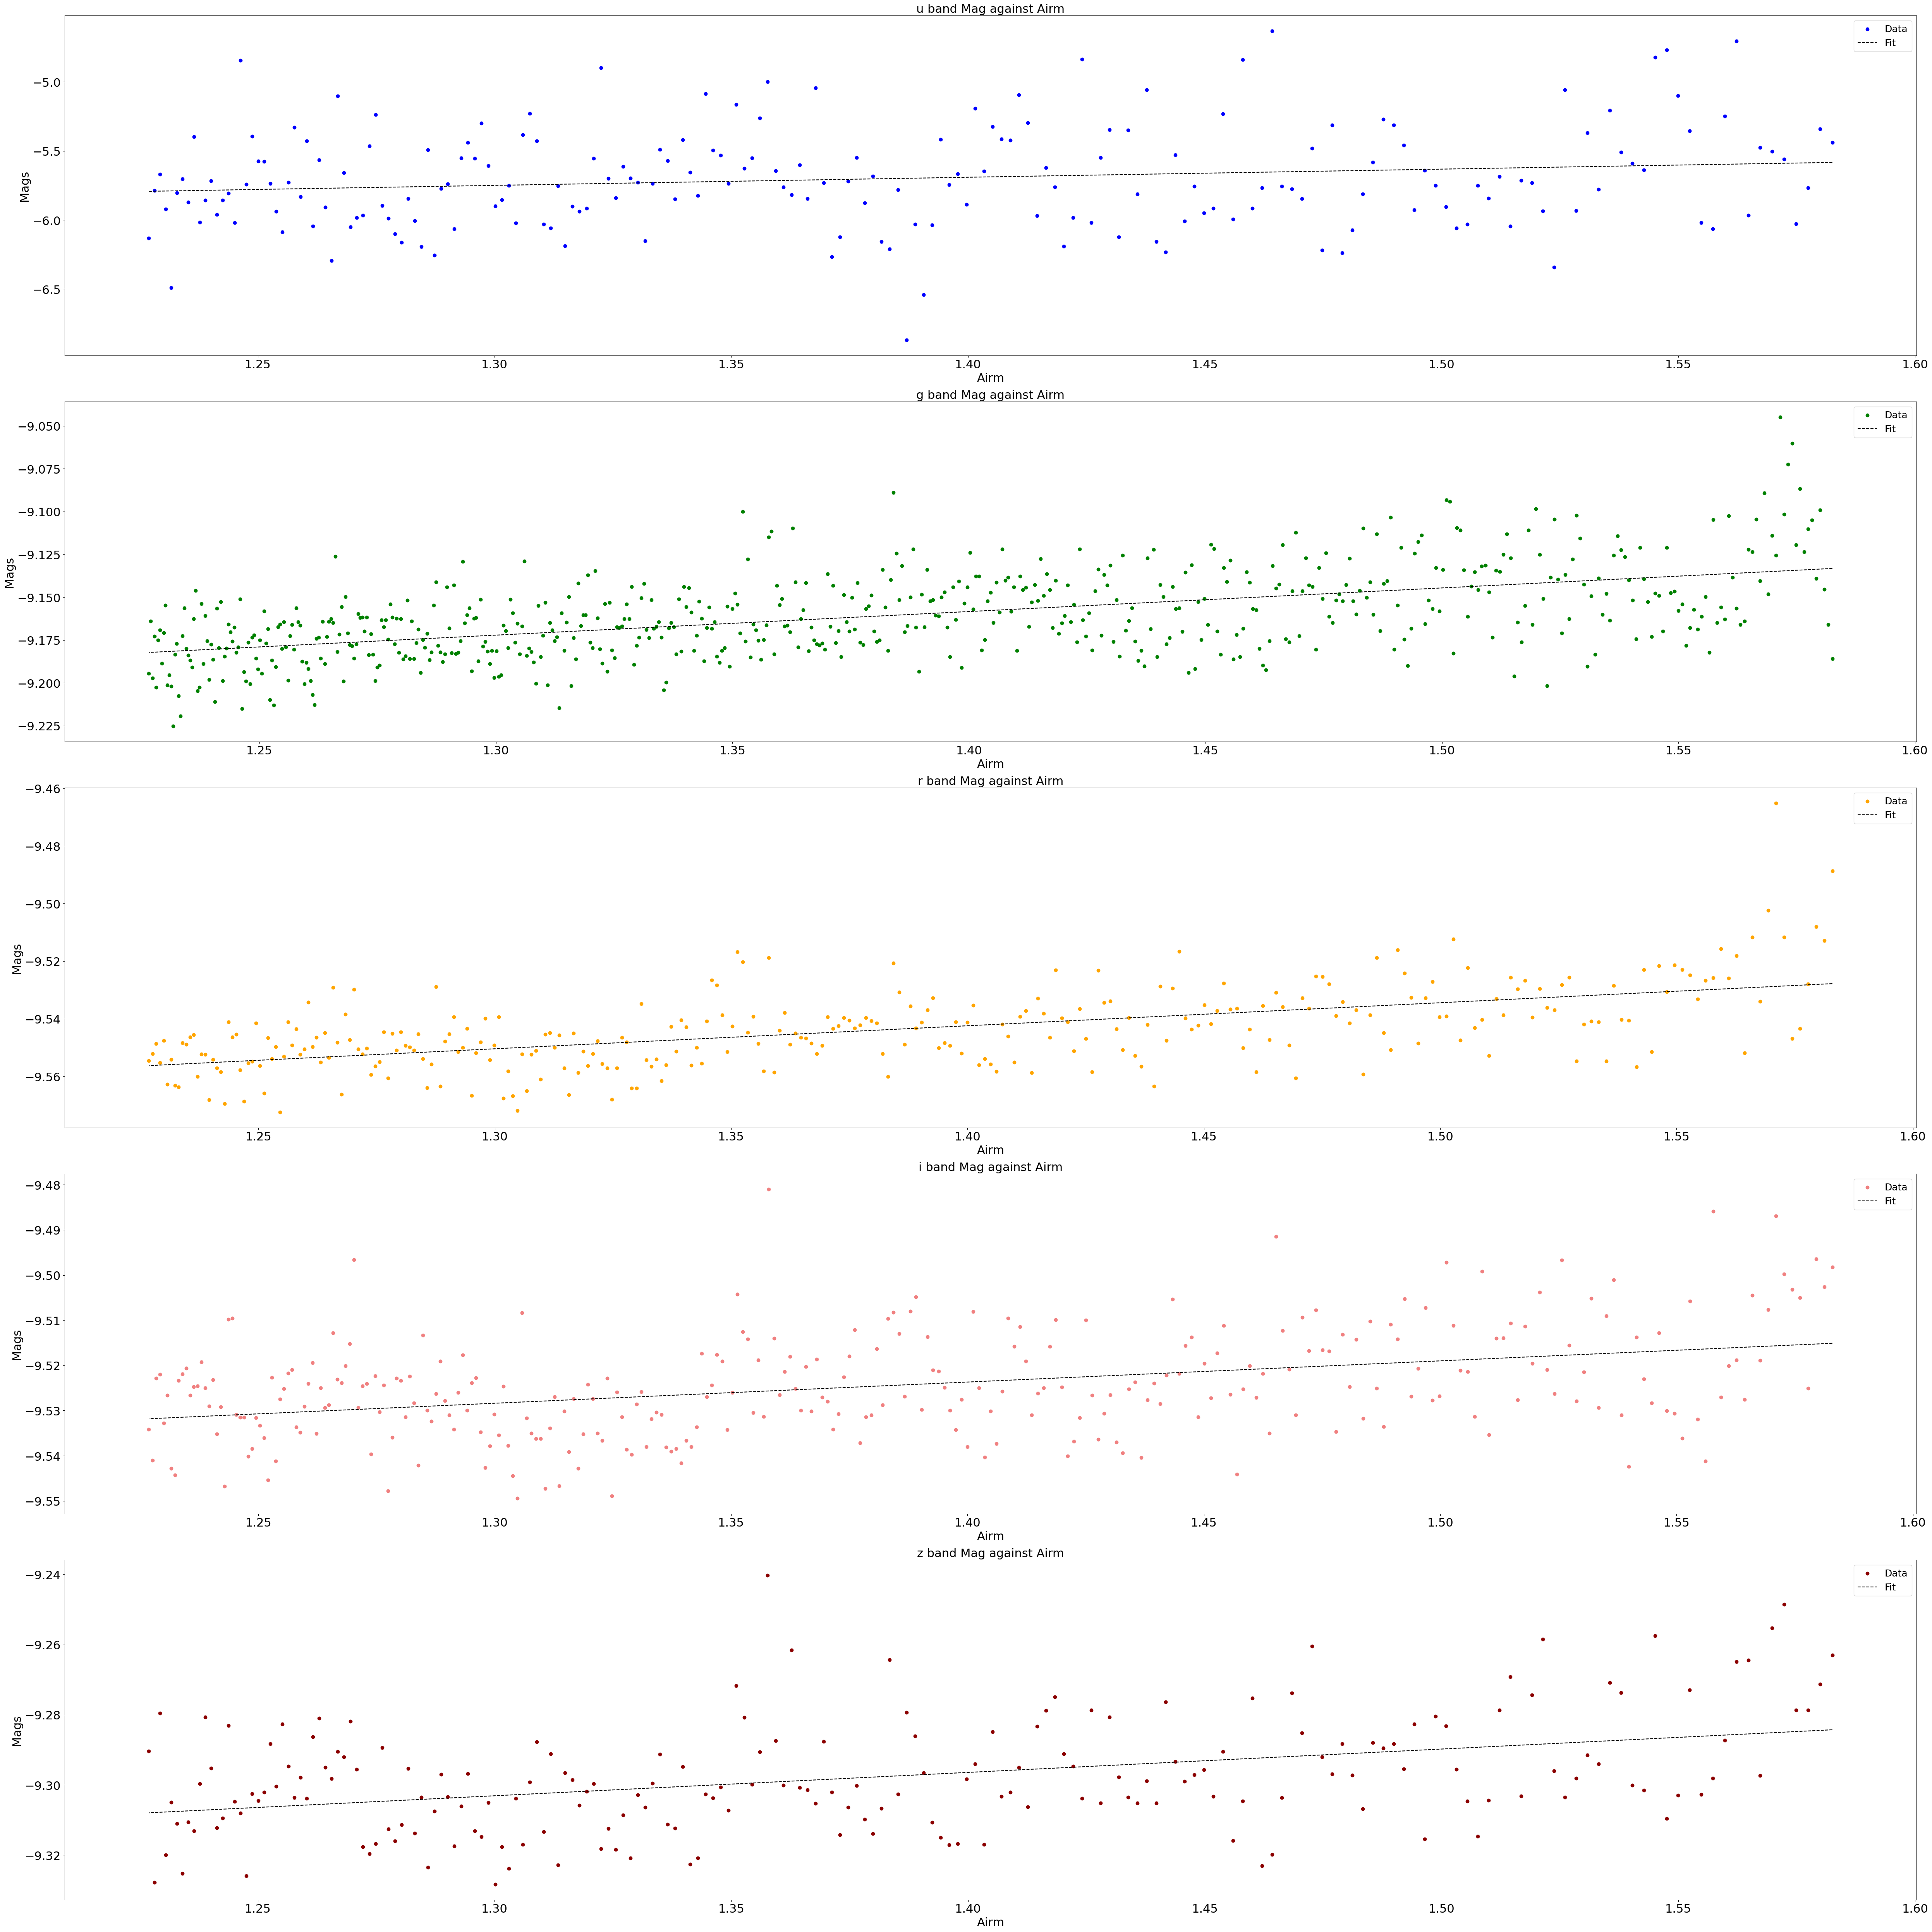

In [14]:
bands = ['u', 'g', 'r', 'i', 'z']
mags = [airm_mag_u,airm_mag_g,airm_mag_r,airm_mag_i,airm_mag_z]
airm = [airm_am_u,airm_am_g,airm_am_r,airm_am_i,airm_am_z]
colours = ['b', 'g', 'orange', 'lightcoral', 'darkred']
kx = []

fig, axs = plt.subplots(nrows=5, figsize=(50,50))  # Adjust figsize as needed


for i, (band, mag, air, colour) in enumerate(zip(bands, mags, airm, colours)):
    # Plot the original data
    axs[i].scatter(air, mag, color=colour, label='Data')

    # Fit a straight line
    coefficients = np.polyfit(air, mag, 1)  # 1 for linear fit
    poly = np.poly1d(coefficients)
    fitted_line = poly(air)
    kx.append(coefficients[0])
    # Plot the fitted line
    axs[i].plot(air, fitted_line, color='black', linestyle='--', label='Fit')

    # Set title and labels
    axs[i].set_title(f"{band.lower()} band Mag against Airm", fontsize=22)
    axs[i].set_xlabel("Airm", fontsize=22)
    axs[i].set_ylabel('Mags', fontsize=22)
    axs[i].tick_params(axis='both', which='major', labelsize=22)
    axs[i].tick_params(axis='both', which='minor', labelsize=22)

    # Add legend
    axs[i].legend(fontsize=18)
    m, c = coefficients
    print(f'y = {m:.2f}x + {c:.2f}')
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Using the kx calculated above, now calculate the magnitude zeropoint of the instrument and then correct the light curve using the observed standard star (Feige66) and its intrinsic magnitude from Brown 2023(?)

In [15]:

stdpath =r'/home/pha19jgb/Science_Runs/2024_04_30/FluxCal/12.11/std_11_02.log'
std_date = stdpath.split('/')[-2]

stdlog = hcam.hlog.Hlog.rascii(stdpath)
tel_location = EarthLocation.of_site('Roque de los Muchachos, La Palma')
std = coord.SkyCoord("12:37:26.0","+25:04:22",unit=(u.hourangle, u.deg), frame='icrs')

In [16]:
std_u = stdlog.tseries("1","1")
std_g = stdlog.tseries("2","1")
std_r = stdlog.tseries("3","1")
std_i = stdlog.tseries("4","1")
std_z = stdlog.tseries("5","1")

obstime_u_std = time.Time(std_u.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_g_std = time.Time(std_g.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_r_std = time.Time(std_r.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_i_std = time.Time(std_i.t, format = 'mjd' , scale = 'utc', location = tel_location)
obstime_z_std = time.Time(std_z.t, format = 'mjd' , scale = 'utc', location = tel_location)

barydelta_u_std = obstime_u_std.light_travel_time(std)
barydelta_g_std = obstime_g_std.light_travel_time(std)
barydelta_r_std = obstime_r_std.light_travel_time(std) 
barydelta_i_std = obstime_i_std.light_travel_time(std) 
barydelta_z_std = obstime_z_std.light_travel_time(std)

baryobs_u_std = (obstime_u_std.tdb + barydelta_u_std).value
baryobs_g_std = (obstime_g_std.tdb + barydelta_g_std).value
baryobs_r_std = (obstime_r_std.tdb + barydelta_r_std).value
baryobs_i_std = (obstime_i_std.tdb + barydelta_i_std).value
baryobs_z_std = (obstime_z_std.tdb + barydelta_z_std).value

std_flux_u , std_flux_u_err, std_flux_u_std_err  = y_to_flux(std_u.y , std_u.ye, std_u.te)
std_flux_g , std_flux_g_err, std_flux_g_std_err  = y_to_flux(std_g.y , std_g.ye, std_g.te)
std_flux_r , std_flux_r_err, std_flux_r_std_err  = y_to_flux(std_r.y , std_r.ye, std_r.te)
std_flux_i , std_flux_i_err, std_flux_i_std_err  = y_to_flux(std_i.y , std_i.ye, std_i.te)
std_flux_z , std_flux_z_err, std_flux_z_std_err  = y_to_flux(std_z.y , std_z.ye, std_z.te)

std_mag_u , std_mag_u_err = flux_to_mag(std_flux_u,std_flux_u_err)
std_mag_g , std_mag_g_err = flux_to_mag(std_flux_g,std_flux_g_err)
std_mag_r , std_mag_r_err = flux_to_mag(std_flux_r,std_flux_r_err)
std_mag_i , std_mag_i_err = flux_to_mag(std_flux_i,std_flux_i_err)
std_mag_z , std_mag_z_err = flux_to_mag(std_flux_z,std_flux_z_err)

std_airm_u = airmass(std,obstime_u_std)
std_airm_g = airmass(std,obstime_g_std)
std_airm_r = airmass(std,obstime_r_std)
std_airm_i = airmass(std,obstime_i_std)
std_airm_z = airmass(std,obstime_z_std)

In [17]:
mzp_u = 9.924 - std_mag_u + kx[0]*std_airm_u #mzp,x = m0,std,x − mi,std,x + kxXstd , 
mzp_g = 10.236 - std_mag_g + kx[1]*std_airm_g
mzp_r = 10.731 - std_mag_r + kx[2]*std_airm_r
mzp_i = 11.138 - std_mag_i +kx[3]*std_airm_i
mzp_z = 11.464 - std_mag_z + kx[4]*std_airm_z
#m0,std,x has come from Brown 2022 Appendix A

mzp_u = np.median(mzp_u)
mzp_g = np.median(mzp_g)
mzp_r = np.median(mzp_r)
mzp_i = np.median(mzp_i)
mzp_z = np.median(mzp_z)

mzp = np.array([mzp_u, mzp_g, mzp_r, mzp_i, mzp_z])
print(mzp)
#mzp = np.array([28.15,29.22,28.78,28.43,27.94 ])
mzp = np.array([27.588,28.843,28.433,28.055,27.765]) #stevens zeropoints, we are going to use these
print(mzp)


[27.82957988 28.90039232 28.54215066 28.21798698 27.86217411]
[27.588 28.843 28.433 28.055 27.765]


In [18]:
#testing with zeropoints from HiPERCAM Info and PHY217 kx
#kx = np.array([0.55 , 0.25, 0.15, 0.09, 0.06])


In [19]:
calib_u = sci_mag_u - ( kx[0]*sci_airm_u) + mzp[0] #m0,targ,x = mi,targ,x − kxXtarg + mzp,x
calib_u_c = comp_mag_u - ( kx[0]*comp_airm_u) + mzp[0]
calib_u_err_c = comp_mag_u_err - ( kx[0]*comp_airm_u) + mzp[0]
fcal_u = magAB_to_flux(calib_u)
#fcal_u_c = magAB_to_flux(calib_u_c)

fcal_u = magAB_to_flux(calib_u)
fcal_u_c = np.median(magAB_to_flux(calib_u_c))
fcal_u_c_err = magAB_to_flux(calib_u_err_c)

calib_g = sci_mag_g - ( kx[1]*sci_airm_g) + mzp[1] #m0,targ,x = mi,targ,x − kxXtarg + mzp,x
calib_g_c = comp_mag_g - ( kx[1]*comp_airm_g) + mzp[1]
fcal_g = magAB_to_flux(calib_g)
fcal_g_c = magAB_to_flux(calib_g_c)

calib_r = sci_mag_r - ( kx[2]*sci_airm_r) + mzp[2] #m0,targ,x = mi,targ,x − kxXtarg + mzp,x
calib_r_c = comp_mag_r - ( kx[2]*comp_airm_r) + mzp[2]
fcal_r = magAB_to_flux(calib_r)
fcal_r_c = magAB_to_flux(calib_r_c)

calib_i = sci_mag_i - ( kx[3]*sci_airm_i) + mzp[3] #m0,targ,x = mi,targ,x − kxXtarg + mzp,x
calib_i_c = comp_mag_i - ( kx[3]*comp_airm_i) + mzp[3]
fcal_i = magAB_to_flux(calib_i)
fcal_i_c = magAB_to_flux(calib_i_c)

calib_z = sci_mag_z - ( kx[4]*sci_airm_z) + mzp[4] #m0,targ,x = mi,targ,x − kxXtarg + mzp,x
calib_z_c = comp_mag_z - ( kx[4]*comp_airm_z) + mzp[4]
fcal_z = magAB_to_flux(calib_z)
fcal_z_c = magAB_to_flux(calib_z_c)

In [20]:
print(calib_g_c)

#individual comparison star calibrations
calib_ind1_u = ind1_mag_u - ( kx[0]*ind1_airm_u) + mzp[0]
calib_ind2_u = ind2_mag_u - ( kx[0]*ind2_airm_u) + mzp[0]

fcal_ind1_u = magAB_to_flux(calib_ind1_u)
fcal_ind2_u = magAB_to_flux(calib_ind2_u)

fcaltot_u = np.median(fcal_ind1_u + fcal_ind2_u)


calib_ind1_g = ind1_mag_g - ( kx[1]*ind1_airm_g) + mzp[1]
calib_ind2_g = ind2_mag_g - ( kx[1]*ind2_airm_g) + mzp[1]

fcal_ind1_g = magAB_to_flux(calib_ind1_g)
fcal_ind2_g = magAB_to_flux(calib_ind2_g)

fcaltot_g = np.median(fcal_ind1_g + fcal_ind2_g)

calib_ind1_r = ind1_mag_r - ( kx[2]*ind1_airm_r) + mzp[2]
calib_ind2_r = ind2_mag_r - ( kx[2]*ind2_airm_r) + mzp[2]

fcal_ind1_r = magAB_to_flux(calib_ind1_r)
fcal_ind2_r = magAB_to_flux(calib_ind2_r)

fcaltot_r =np.median( fcal_ind1_r + fcal_ind2_r)

calib_ind1_i = ind1_mag_i - ( kx[3]*ind1_airm_i) + mzp[3]
calib_ind2_i = ind2_mag_i - ( kx[3]*ind2_airm_i) + mzp[3]

fcal_ind1_i = magAB_to_flux(calib_ind1_i)
fcal_ind2_i = magAB_to_flux(calib_ind2_i)

fcaltot_i = np.median(fcal_ind1_i + fcal_ind2_i)

calib_ind1_z = ind1_mag_z - ( kx[4]*ind1_airm_z) + mzp[4]
calib_ind2_z = ind2_mag_z - ( kx[4]*ind2_airm_z) + mzp[4]

fcal_ind1_z = magAB_to_flux(calib_ind1_z)
fcal_ind2_z = magAB_to_flux(calib_ind2_z)

fcaltot_z = np.median(fcal_ind1_z + fcal_ind2_z)

[13.54108086 13.54106586 13.54330535 ... 13.56412081 13.55879414
 13.55925245]


In [21]:
print( calib_ind1_g , calib_ind2_g)
print(fcal_ind1_g , fcal_ind2_g)
print(fcal_u_c)


[14.13768616 14.13866203 14.14150519 ... 14.16176562 14.15218174
 14.1539094 ] [14.47584954 14.47448509 14.47590251 ... 14.49747328 14.49797451
 14.4966876 ]
[0.00803388 0.00802667 0.00800567 ... 0.00785767 0.00792734 0.00791473] [0.00588383 0.00589123 0.00588354 ... 0.00576781 0.00576514 0.00577198]
0.015502800518467509


In [22]:
#setting the reference epoch and period in order to phase fold the data,
#reference_epoch = 55641.431322
reference_epoch =55641.43601610334
period = 0.24613528148209396

cal_flux_u = ratio_u * fcal_u_c
#cal_flux_u = ratio_u * fcaltot_u


cal_flux_g = ratio_g * fcaltot_g
#cal_flux_g = ratio_g * fcal_g_c

cal_flux_r = ratio_r * fcaltot_r
#cal_flux_r = ratio_r * fcal_r_c

cal_flux_i = ratio_i * fcaltot_i
#cal_flux_i = ratio_i * fcal_i_c

cal_flux_z = ratio_z * fcaltot_z
#cal_flux_z = ratio_z * fcal_z_c
#diffFluxErr = ((t_ye / t_y)**2 + (c_ye / c_y)**2)**0.5 * np.abs(diffFlux)
diffFluxErr_u = ((sci_u.ye / sci_u.y)**2 + (comp_u.ye / comp_u.y)**2)**0.5 * np.abs(cal_flux_u)

diffFluxErr_g = ((sci_g.ye / sci_g.y)**2 + (comp_g.ye / comp_g.y)**2)**0.5 * np.abs(cal_flux_g)

diffFluxErr_r = ((sci_r.ye / sci_r.y)**2 + (comp_r.ye / comp_r.y)**2)**0.5 * np.abs(cal_flux_r)

diffFluxErr_i = ((sci_i.ye / sci_i.y)**2 + (comp_i.ye / comp_i.y)**2)**0.5 * np.abs(cal_flux_i)

diffFluxErr_z = ((sci_z.ye / sci_z.y)**2 + (comp_z.ye / comp_z.y)**2)**0.5 * np.abs(cal_flux_z)


# Calculate the phase for each data point in your array

phase_u = calculate_phase(baryobs_u_t,reference_epoch,period)
#compo star *should* be TYC 4421-2130-1

u_te = np.array(sci_u.te)
u_mid = np.array(sci_u.t)
w_factors = np.repeat(1,len(obstime_u_t))




#remove bad point from the uband
print(np.argmin(cal_flux_u))
cal_flux_u1 = np.delete(cal_flux_u,1114)
phase_u_del = np.delete(phase_u,1114)
ratio_u1 = np.delete(ratio_u,1114)
u_mid1=np.delete(u_mid,1114)
u_te1=np.delete(u_te,1114)
sci_flux_u_err1 =np.delete(sci_flux_u_err,1114)
w_factors1 = np.delete(w_factors,1114)

1114


In [23]:
print(np.median(flux_to_ABmag(cal_flux_u)),'actual',13.548)
print(np.median(flux_to_ABmag(cal_flux_g)),'actual',13.432)
print(np.median(flux_to_ABmag(cal_flux_r)),'actual',13.441)
print(np.median(flux_to_ABmag(cal_flux_i)),'actual',13.701)
print(np.median(flux_to_ABmag(cal_flux_z)),'actual',13.987)




print(np.median(cal_flux_u))
print(np.median(cal_flux_g))
print(np.median(cal_flux_r))
print(np.median(cal_flux_i))
print(np.median(cal_flux_z))

13.45211904636777 actual 13.548
13.277377925793598 actual 13.432
13.543852209187904 actual 13.441
13.790783525039208 actual 13.701
14.121704362309035 actual 13.987
0.015106100908592811
0.017743889722111293
0.013882226190810303
0.011058254734357922
0.008153015257795495


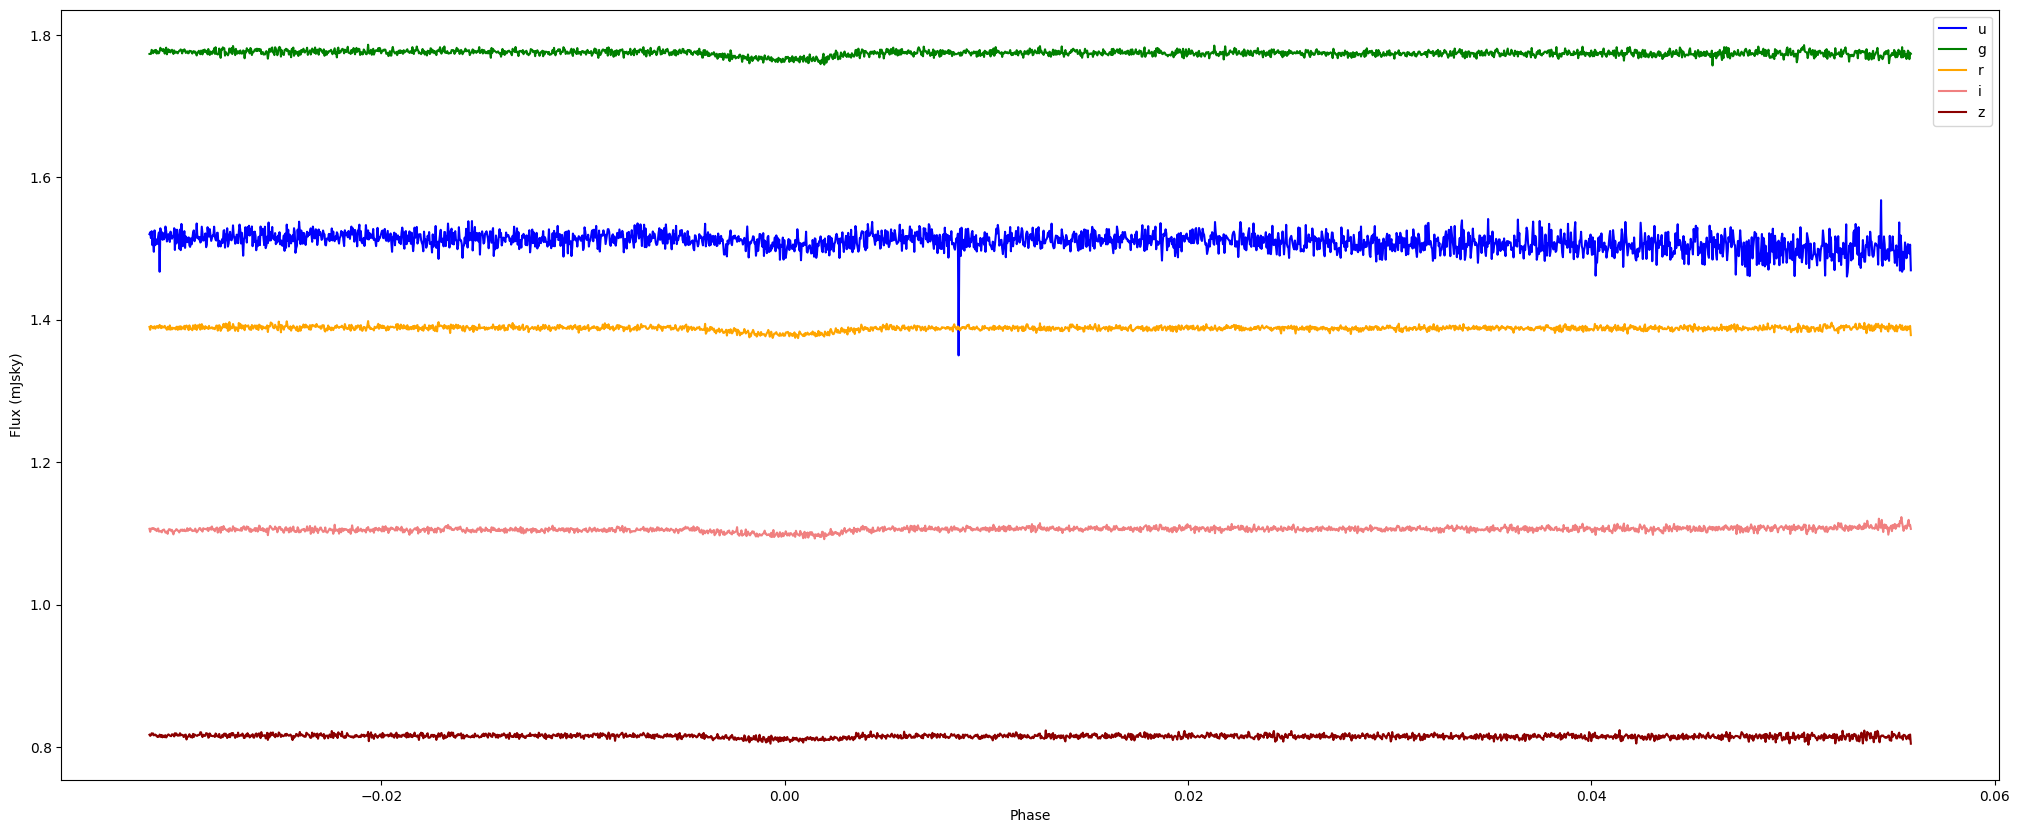

In [24]:
#plotting the flux calibrated lightcurves
bands = ['u', 'g', 'r', 'i', 'z']
colours = ['b', 'g', 'orange', 'lightcoral', 'darkred']

fig, ax = plt.subplots(figsize=(25, 10))

# Plot each band with its corresponding color and label
ax.plot(phase_u, cal_flux_u * 100, color=colours[0], label=bands[0])
ax.plot(phase_u, cal_flux_g * 100, color=colours[1], label=bands[1])
#ax.scatter(phase_u,cal_flux_u*100, color ='red')
#ax.plot(phase_u , diffFluxErr * 100)
ax.plot(phase_u, cal_flux_r * 100, color=colours[2], label=bands[2])
ax.plot(phase_u, cal_flux_i * 100, color=colours[3], label=bands[3])
ax.plot(phase_u, cal_flux_z * 100, color=colours[4], label=bands[4])

#ax.plot(phase_u,ratio_u , color=colours[0], label=bands[0])
#ax.plot(phase_u, fcal_g / fcaltot_g , color=colours[1], label=bands[1])
#ax.scatter(phase_u,cal_flux_u*100, color ='red')
#ax.plot(phase_u , diffFluxErr * 100)
#ax.plot(phase_u, fcal_r / fcaltot_r, color=colours[2], label=bands[2])
#ax.plot(phase_u, fcal_i / fcaltot_i , color=colours[3], label=bands[3])
#ax.plot(phase_u, fcal_z / fcaltot_z , color=colours[4], label=bands[4])

# Add labels and formatting
ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')


ax.legend()

plt.show()

In [25]:
w_factors = np.repeat(1,len(obstime_u_t))



g_mid = np.array(sci_g.t)
g_te = np.array(sci_g.te)

r_mid = np.array(sci_r.t)
r_te = np.array(sci_r.te)

i_mid = np.array(sci_i.t)
i_te = np.array(sci_i.te)

z_mid = np.array(sci_z.t)
z_te = np.array(sci_z.te)

In [26]:
#going to column stack data for the eventual lcurve data file

#normal_g = (cal_flux_g - np.min(cal_flux_g)) / (np.max(cal_flux_g) - np.min(cal_flux_g))

sci_flux_u_err = np.array(diffFluxErr_u)
sci_flux_g_err = np.array(diffFluxErr_g)
sci_flux_r_err = np.array(diffFluxErr_r)
sci_flux_i_err = np.array(diffFluxErr_i)
sci_flux_z_err = np.array(diffFluxErr_z)




w_factors = np.array(w_factors)

#col_u = np.column_stack((u_mid, u_te, cal_flux_u, sci_flux_u_err, w_factors1, w_factors1))
col_g = np.column_stack((g_mid, g_te, cal_flux_g, sci_flux_g_err, w_factors, w_factors))
col_r = np.column_stack((r_mid, r_te, cal_flux_r, sci_flux_r_err, w_factors, w_factors))
col_i = np.column_stack((i_mid, i_te, cal_flux_i, sci_flux_i_err, w_factors, w_factors))
col_z = np.column_stack((z_mid, z_te, cal_flux_z, sci_flux_z_err, w_factors, w_factors))




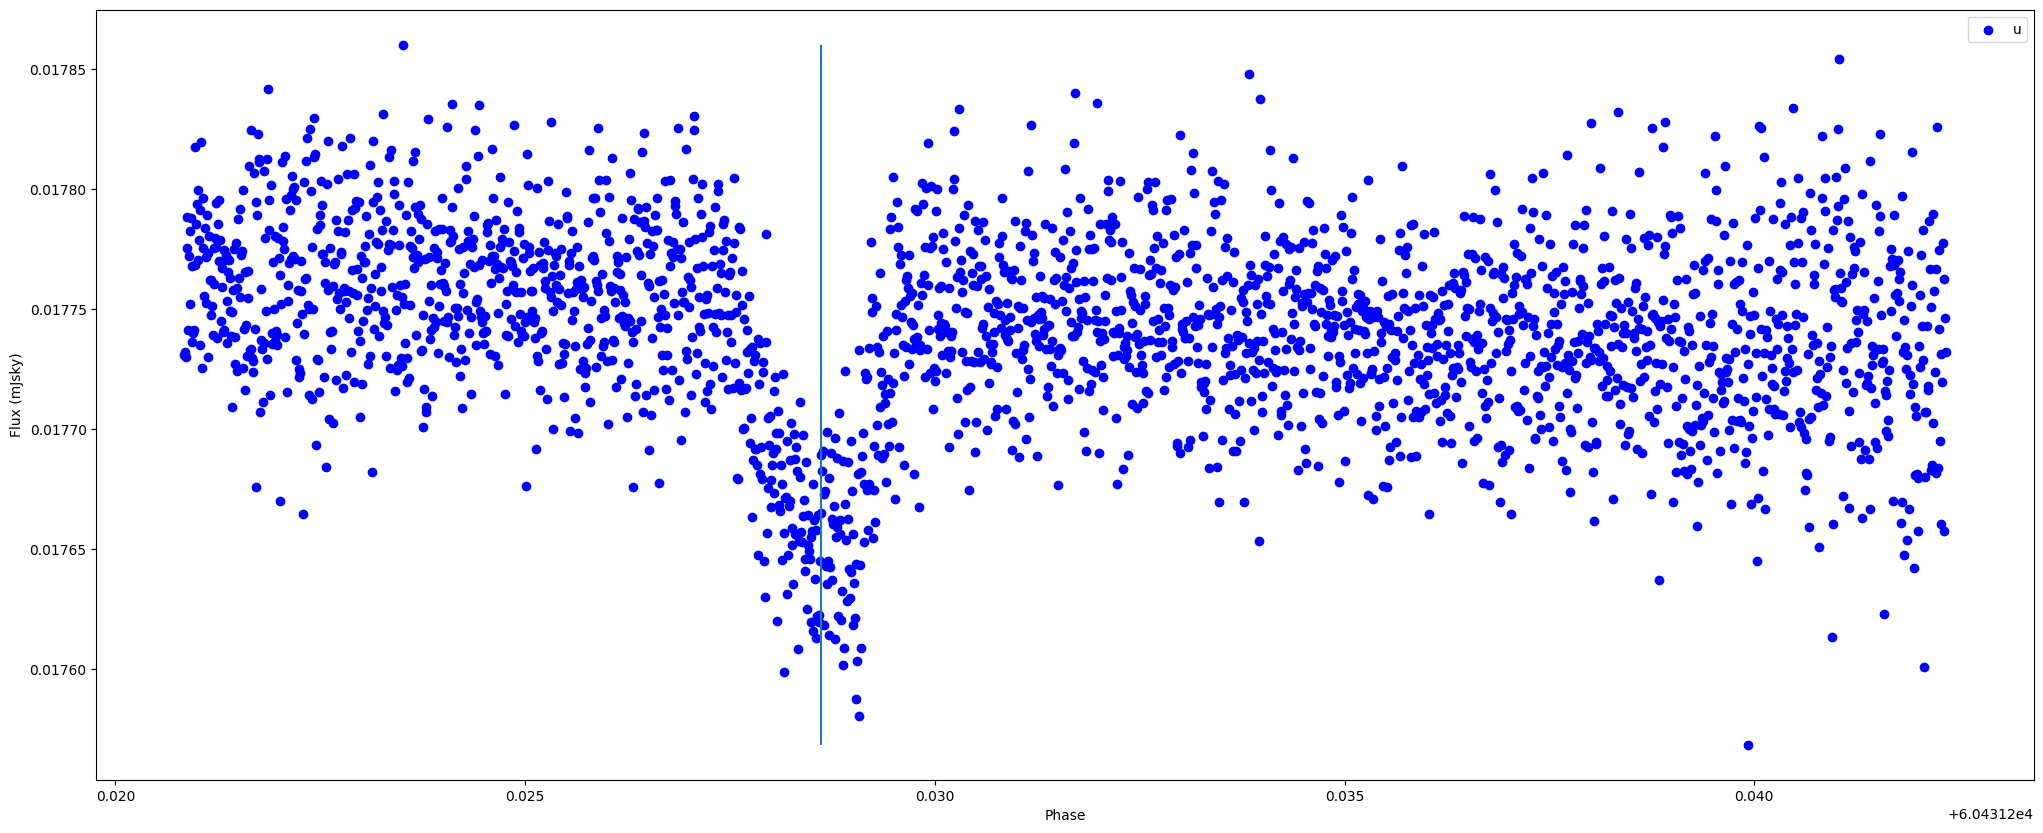

893
60431.228757578305


In [27]:


fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(baryobs_g_t,cal_flux_g, color=colours[0], label=bands[0])
ax.vlines(baryobs_g_t[876],np.min(cal_flux_g),np.max(cal_flux_g))

ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')

# Add a legend to distinguish the lines
ax.legend()

plt.show()
print(np.argmin(cal_flux_r))
print(baryobs_r_t[893])

In [28]:
def eclipse_clip(x,y,z,a,b,upper,lower):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    a = np.array(a)
    # Find the indices where x is within the specified range
    indices = (x >= lower) & (x <= upper)
    
    # Clip the x and y arrays using the indices
    x_clipped = x[indices]
    y_clipped = y[indices]
    z_clipped = z[indices]
    a_clipped = a[indices]
    b_clipped = b[indices]
    w_clip = np.ones_like(x_clipped)
    
    return x_clipped, y_clipped, z_clipped, a_clipped, w_clip, b_clipped
    
u_phase_clip , u_flux_clip, u_flux_err_clip , u_mid_clip,w_clip,u_te_clip = eclipse_clip(phase_u,cal_flux_u,sci_flux_u_err, u_mid,u_te, 0.025,-0.025)
g_phase_clip , g_flux_clip, g_flux_err_clip , g_mid_clip,w_clip,g_te_clip = eclipse_clip(phase_u,cal_flux_g,sci_flux_g_err, g_mid,g_te, 0.025,-0.025)
r_phase_clip , r_flux_clip, r_flux_err_clip , r_mid_clip,w_clip,r_te_clip = eclipse_clip(phase_u,cal_flux_r,sci_flux_r_err, r_mid,r_te, 0.025,-0.025)
i_phase_clip , i_flux_clip, i_flux_err_clip , i_mid_clip,w_clip,i_te_clip = eclipse_clip(phase_u,cal_flux_i,sci_flux_i_err, i_mid,i_te, 0.025,-0.025)
z_phase_clip , z_flux_clip, z_flux_err_clip , z_mid_clip,w_clip,z_te_clip = eclipse_clip(phase_u,cal_flux_z,sci_flux_z_err, z_mid,z_te, 0.025,-0.025)

In [29]:
def weighted_mean(y, y_err):
    weights = 1 / y_err**2
    return np.sum(y * weights) / np.sum(weights)

u_w_mean = weighted_mean(u_flux_clip,u_flux_err_clip)
g_w_mean = weighted_mean(g_flux_clip,g_flux_err_clip)
r_w_mean = weighted_mean(r_flux_clip,r_flux_err_clip)
i_w_mean = weighted_mean(i_flux_clip,i_flux_err_clip)
z_w_mean = weighted_mean(z_flux_clip,z_flux_err_clip)
print('resc_u_0430 =',u_w_mean)
print('resc_g_0430 =',g_w_mean)
print("resc_r_0430 =",r_w_mean)
print("resc_i_0430 =",i_w_mean)
print("resc_z_0430 =",z_w_mean)



resc_u_0430 = 0.01512393409583383
resc_g_0430 = 0.017742570809383358
resc_r_0430 = 0.013875210069809145
resc_i_0430 = 0.011048752852798467
resc_z_0430 = 0.008152070497749471


In [30]:
#resecale not needed

u_flux_resc_clip = u_flux_clip 
g_flux_resc_clip = g_flux_clip 
r_flux_resc_clip = r_flux_clip 
i_flux_resc_clip = i_flux_clip 
z_flux_resc_clip = z_flux_clip

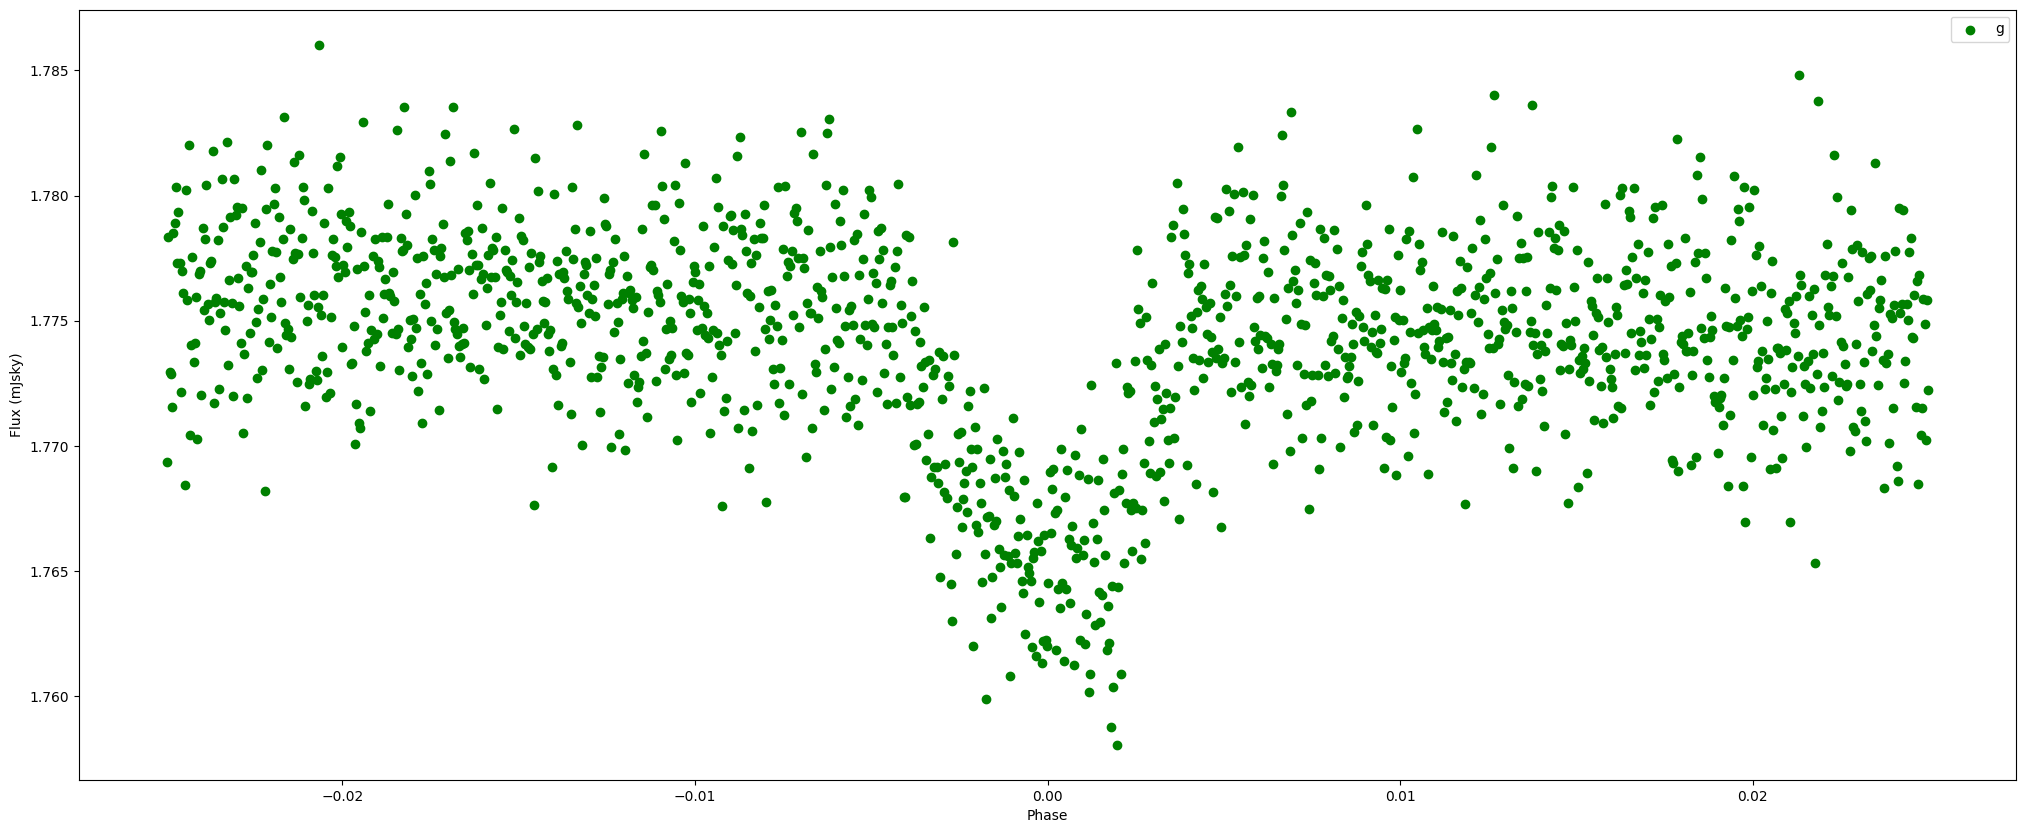

60431.22907669269


In [31]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.scatter(g_phase_clip,g_flux_resc_clip*100, color=colours[1], label=bands[1])


ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')
#ax.set_ylim(1.5,1.75)

ax.legend()

plt.show()

print(baryobs_g_t[929])

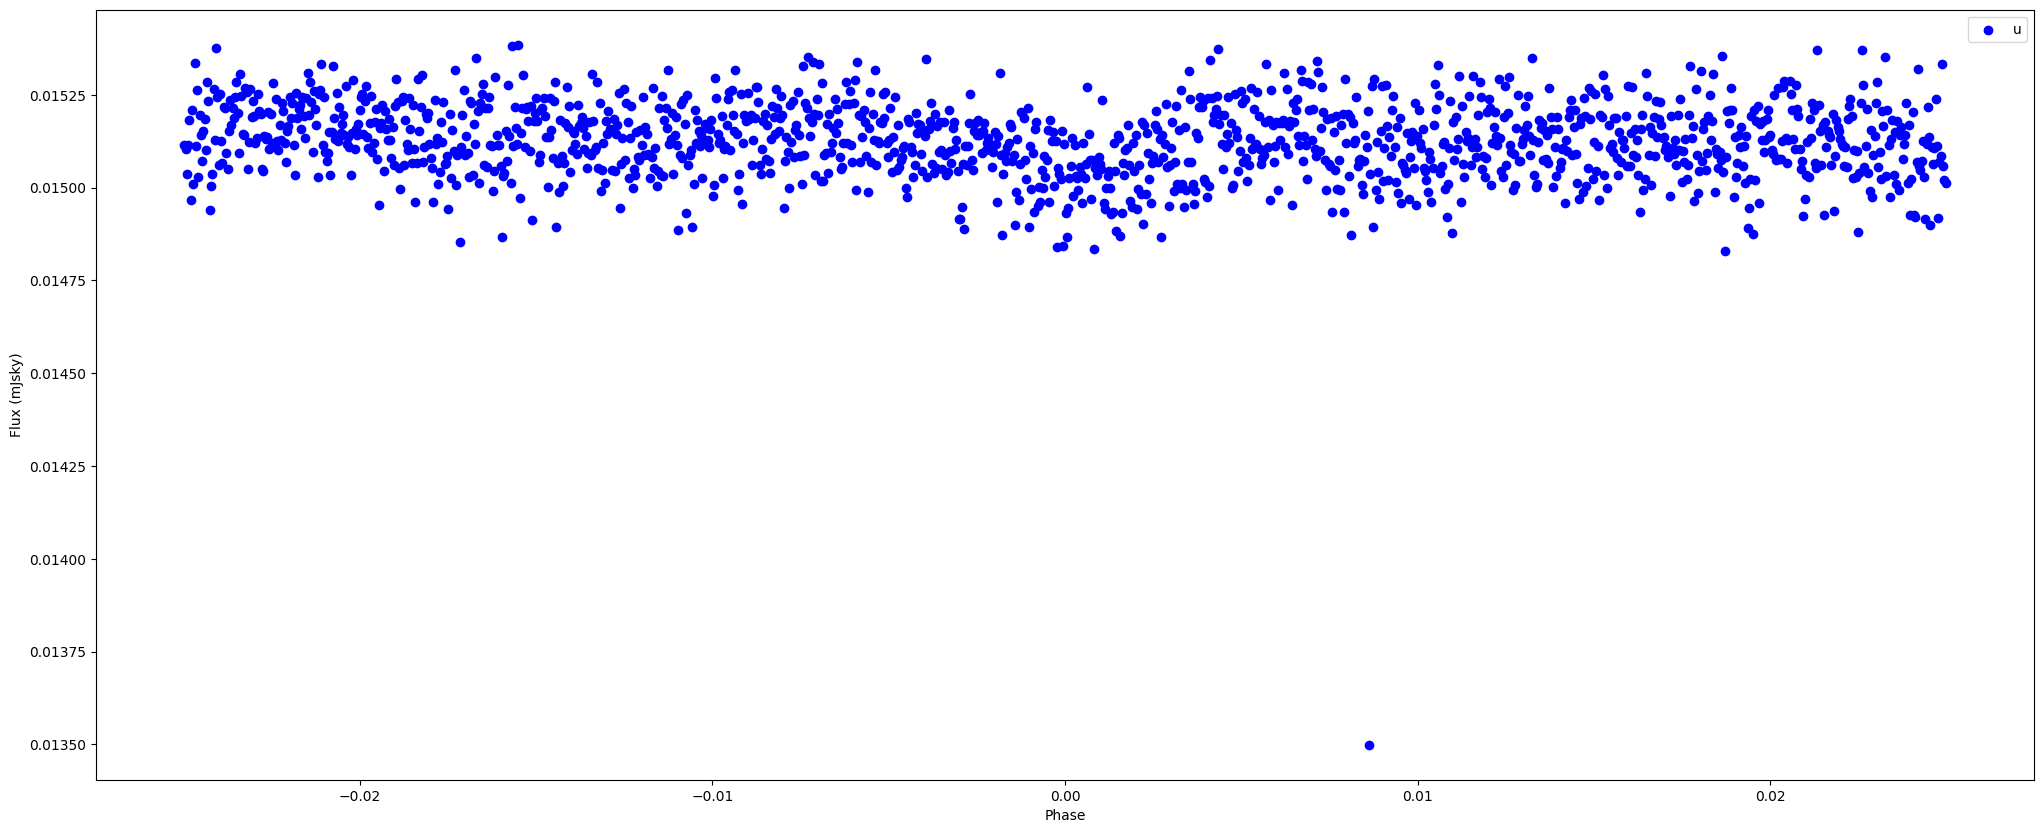

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(u_phase_clip,u_flux_resc_clip, color=colours[0], label=bands[0])


ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')
#ax.set_ylim(1.30,1.55)
# Add a legend to distinguish the lines
ax.legend()

plt.show()

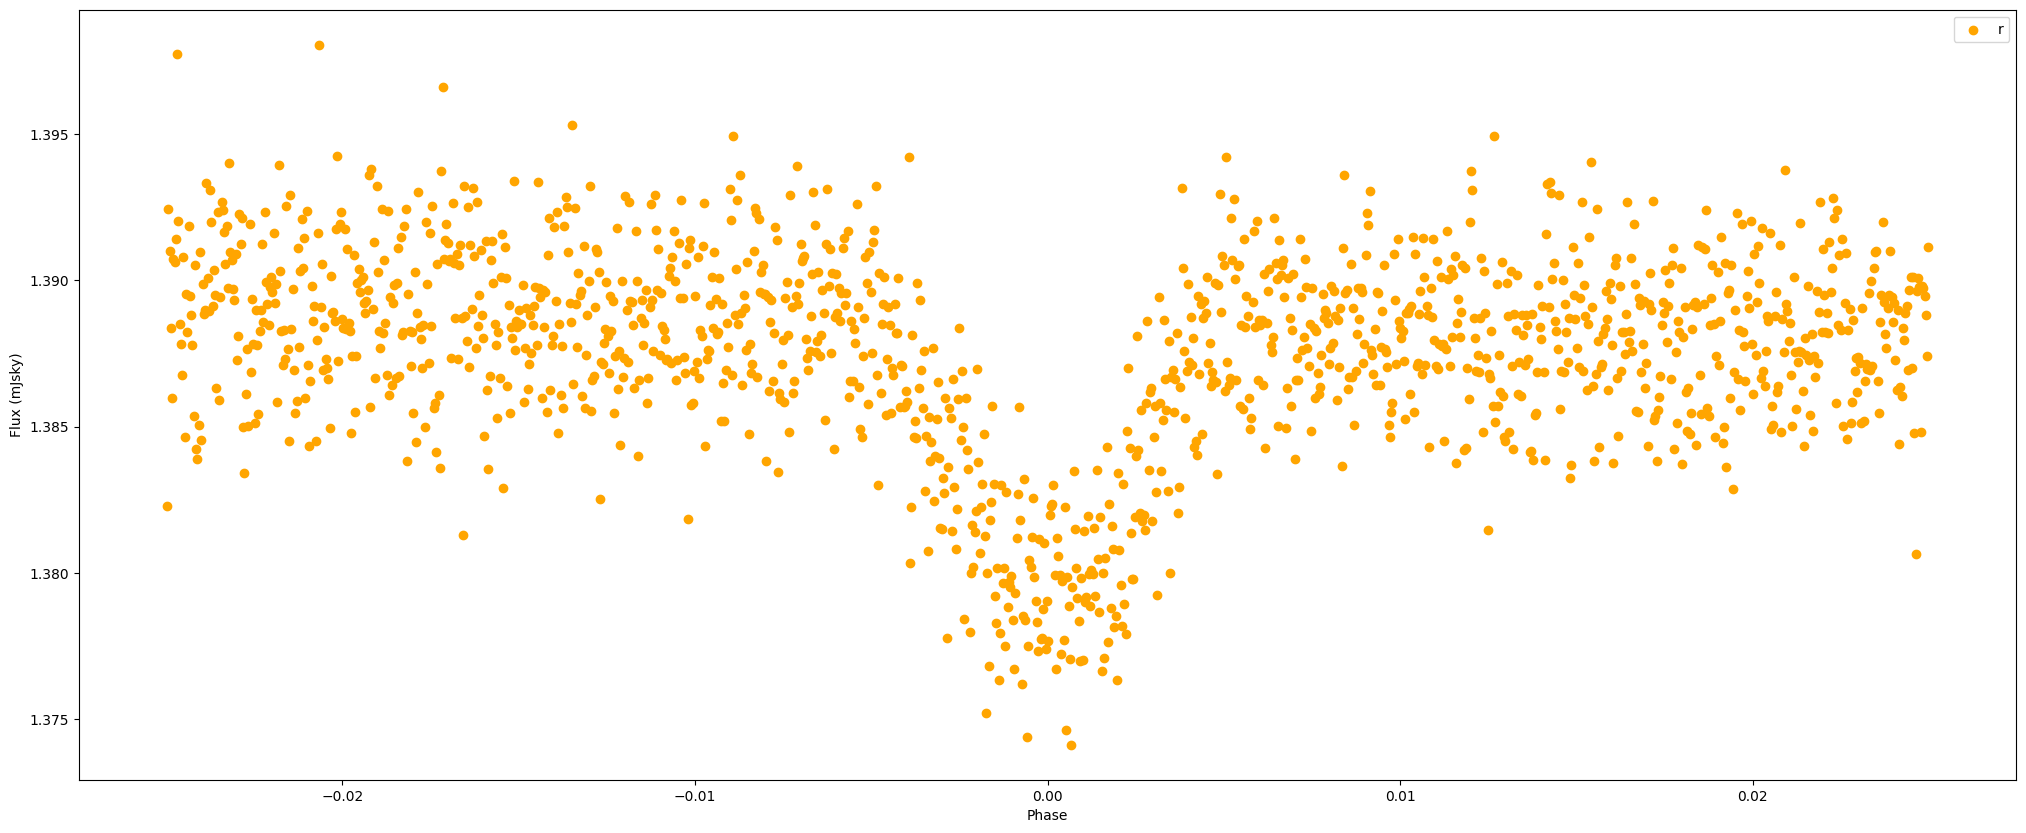

np.float64(60431.22776281824)

In [33]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.scatter(r_phase_clip,r_flux_resc_clip*100, color=colours[2], label=bands[2])
#ax.plot(i_phase_clip,i_flux_clip*100, color=colours[1], label=bands[1])
#ax.plot(z_phase_clip,z_flux_clip*100, color=colours[1], label=bands[1])
ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')
#ax.set_ylim(1.5,1.60)
# Add a legend to distinguish the lines
ax.legend()

plt.show()
np.argmin(r_flux_clip)
r_mid[893]

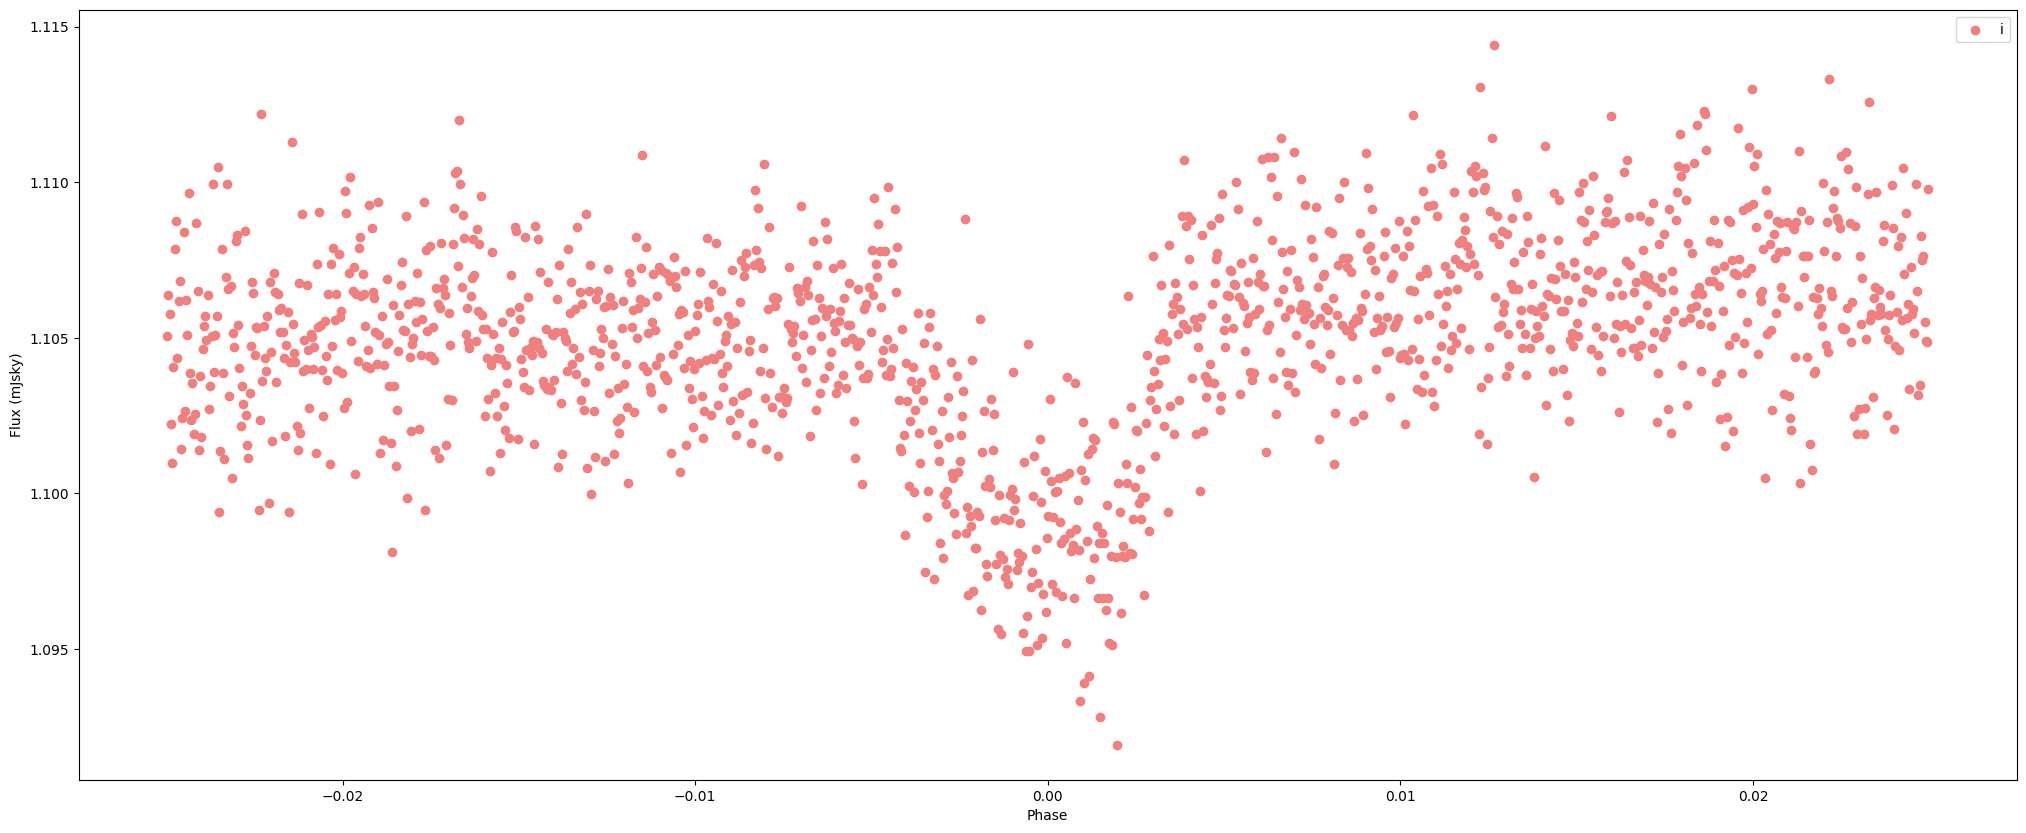

In [34]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(i_phase_clip,i_flux_resc_clip*100 ,color=colours[3], label=bands[3])


ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')
#ax.set_ylim(1.15,1.30)
# Add a legend to distinguish the lines
ax.legend()

plt.show()

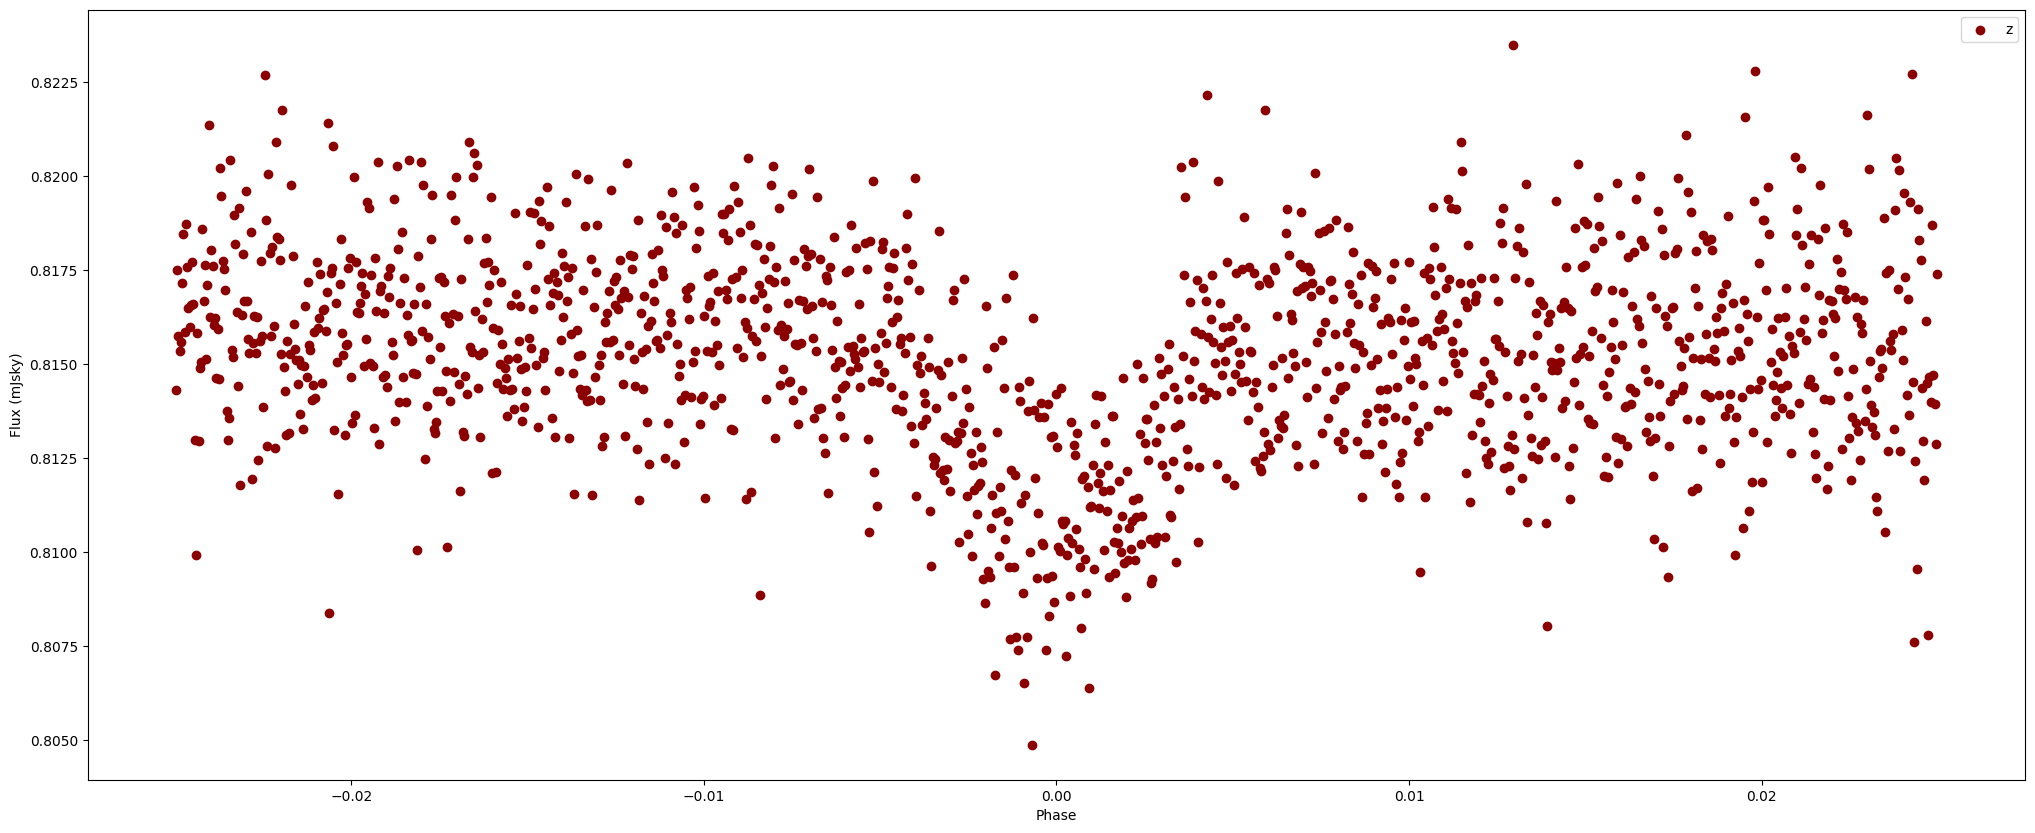

In [35]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(z_phase_clip,z_flux_resc_clip*100, color=colours[4], label=bands[4])


ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')
#ax.set_ylim(0.9,1)
# Add a legend to distinguish the lines
ax.legend()

plt.show()

In [36]:
def weighted_mean(y, y_err):
    weights = 1 / y_err**2
    return np.sum(y * weights) / np.sum(weights)

u_w_mean = weighted_mean(u_flux_clip,u_flux_err_clip)
g_w_mean = weighted_mean(g_flux_clip,g_flux_err_clip)
r_w_mean = weighted_mean(r_flux_clip,r_flux_err_clip)
i_w_mean = weighted_mean(i_flux_clip,i_flux_err_clip)
z_w_mean = weighted_mean(z_flux_clip,z_flux_err_clip)
print('resc_u_0430 =',u_w_mean)
print('resc_g_0430 =',g_w_mean)
print("resc_r_0430 =",r_w_mean)
print("resc_i_0430 =",i_w_mean)
print("resc_z_0430 =",z_w_mean)



resc_u_0430 = 0.01512393409583383
resc_g_0430 = 0.017742570809383358
resc_r_0430 = 0.013875210069809145
resc_i_0430 = 0.011048752852798467
resc_z_0430 = 0.008152070497749471


In [37]:
u_tO = 60431.227660469
g_tO = 60431.2276134251
r_tO = 60431.2275999999
i_tO = 60431.2275984092
z_tO = 60431.2276239701

u_err =0.000088457279
g_err =0.000020090205
r_err =0.000016417065
i_err =0.00002125635
z_err =0.000031202113


u_w = 1/u_err**2
g_w =  1/g_err**2
r_w =  1/r_err**2
i_w =  1/i_err**2
z_w = 1/z_err**2



u_err =0.000088457279
g_err =0.000020090205
r_err =0.000016417065
i_err =0.00002125635
z_err =0.000031202113


invmean = ((u_tO * u_w) + (g_tO * g_w) + (r_tO * r_w) + (i_tO * i_w) + (z_tO * z_w)) /( u_w + g_w +r_w + i_w + z_w )
invmean_err = np.sqrt(1 / ( u_w+ g_w +r_w + i_w + z_w ))
cycle_number = (invmean - reference_epoch) / period

In [38]:
print(invmean)
print(invmean_err)
print(cycle_number)

print(np.argmin(u_flux_resc_clip))

60431.22760649742
1.0229647236777523e-05
19459.99598900466
933


In [39]:
col_u_clip = np.column_stack((u_mid_clip, u_te_clip, u_flux_clip, u_flux_err_clip, w_clip, w_clip))
col_g_clip = np.column_stack((g_mid_clip, g_te_clip, g_flux_clip, g_flux_err_clip, w_clip, w_clip))
col_r_clip = np.column_stack((r_mid_clip, r_te_clip, r_flux_clip, r_flux_err_clip, w_clip, w_clip))
col_i_clip = np.column_stack((i_mid_clip, i_te_clip, i_flux_clip, i_flux_err_clip, w_clip, w_clip))
col_z_clip = np.column_stack((z_mid_clip, z_te_clip, z_flux_clip, z_flux_err_clip, w_clip, w_clip))


np.savetxt(r'/home/pha19jgb/LCURVE/u_clips/0/udat0430.txt',col_u_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/g_clips/0/gdat0430.txt',col_g_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/r_clips/0/rdat0430.txt',col_r_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/i_clips/0/idat0430.txt',col_i_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/z_clips/0/zdat0430.txt',col_z_clip)

In [40]:
print(np.argmin(u_flux_resc_clip))
u_phase_clip = np.delete(u_phase_clip,933)
u_mid_clip = np.delete(u_mid_clip,933)
u_te_clip = np.delete(u_te_clip,933)
u_flux_resc_clip = np.delete(u_flux_resc_clip,933)
u_flux_err_clip = np.delete(u_flux_err_clip,933)
w_clip1 = np.delete(w_clip,933)

933


In [41]:
#u_te to new "Phase" units
u_te_ph = u_te_clip / period
g_te_ph = g_te_clip / period
r_te_ph = r_te_clip / period
i_te_ph = i_te_clip / period
z_te_ph = z_te_clip / period
print(len(u_phase_clip),len(u_te_ph),len(u_flux_resc_clip),len(u_flux_err_clip),len(w_clip1))

1387 1387 1387 1387 1387


In [42]:
ph_col_u_clip = np.column_stack((u_phase_clip, u_te_ph, u_flux_resc_clip, u_flux_err_clip, w_clip1, w_clip1))
ph_col_g_clip = np.column_stack((g_phase_clip, g_te_ph, g_flux_resc_clip, g_flux_err_clip, w_clip, w_clip))
ph_col_r_clip = np.column_stack((r_phase_clip, r_te_ph, r_flux_resc_clip, r_flux_err_clip, w_clip, w_clip))
ph_col_i_clip = np.column_stack((i_phase_clip, i_te_ph, i_flux_resc_clip, i_flux_err_clip, w_clip, w_clip))
ph_col_z_clip = np.column_stack((z_phase_clip, z_te_ph, z_flux_resc_clip, z_flux_err_clip, w_clip, w_clip))

In [43]:
print(u_flux_err_clip)
print(g_flux_err_clip)
print(r_flux_err_clip)
print(i_flux_err_clip)
print(z_flux_err_clip)

[8.61015598e-05 8.70765843e-05 8.58848778e-05 ... 1.03771014e-04
 1.04129640e-04 1.04165082e-04]
[2.39585411e-05 2.40360442e-05 2.39656824e-05 ... 2.63247694e-05
 2.70200765e-05 2.72288917e-05]
[2.03902393e-05 2.05375160e-05 2.05101028e-05 ... 2.13390594e-05
 2.15186187e-05 2.16875300e-05]
[1.94734227e-05 1.94670238e-05 1.94467975e-05 ... 2.16618103e-05
 2.23481902e-05 2.25843009e-05]
[2.00203982e-05 2.00420051e-05 1.99986103e-05 ... 2.18579784e-05
 2.28004616e-05 2.30002731e-05]


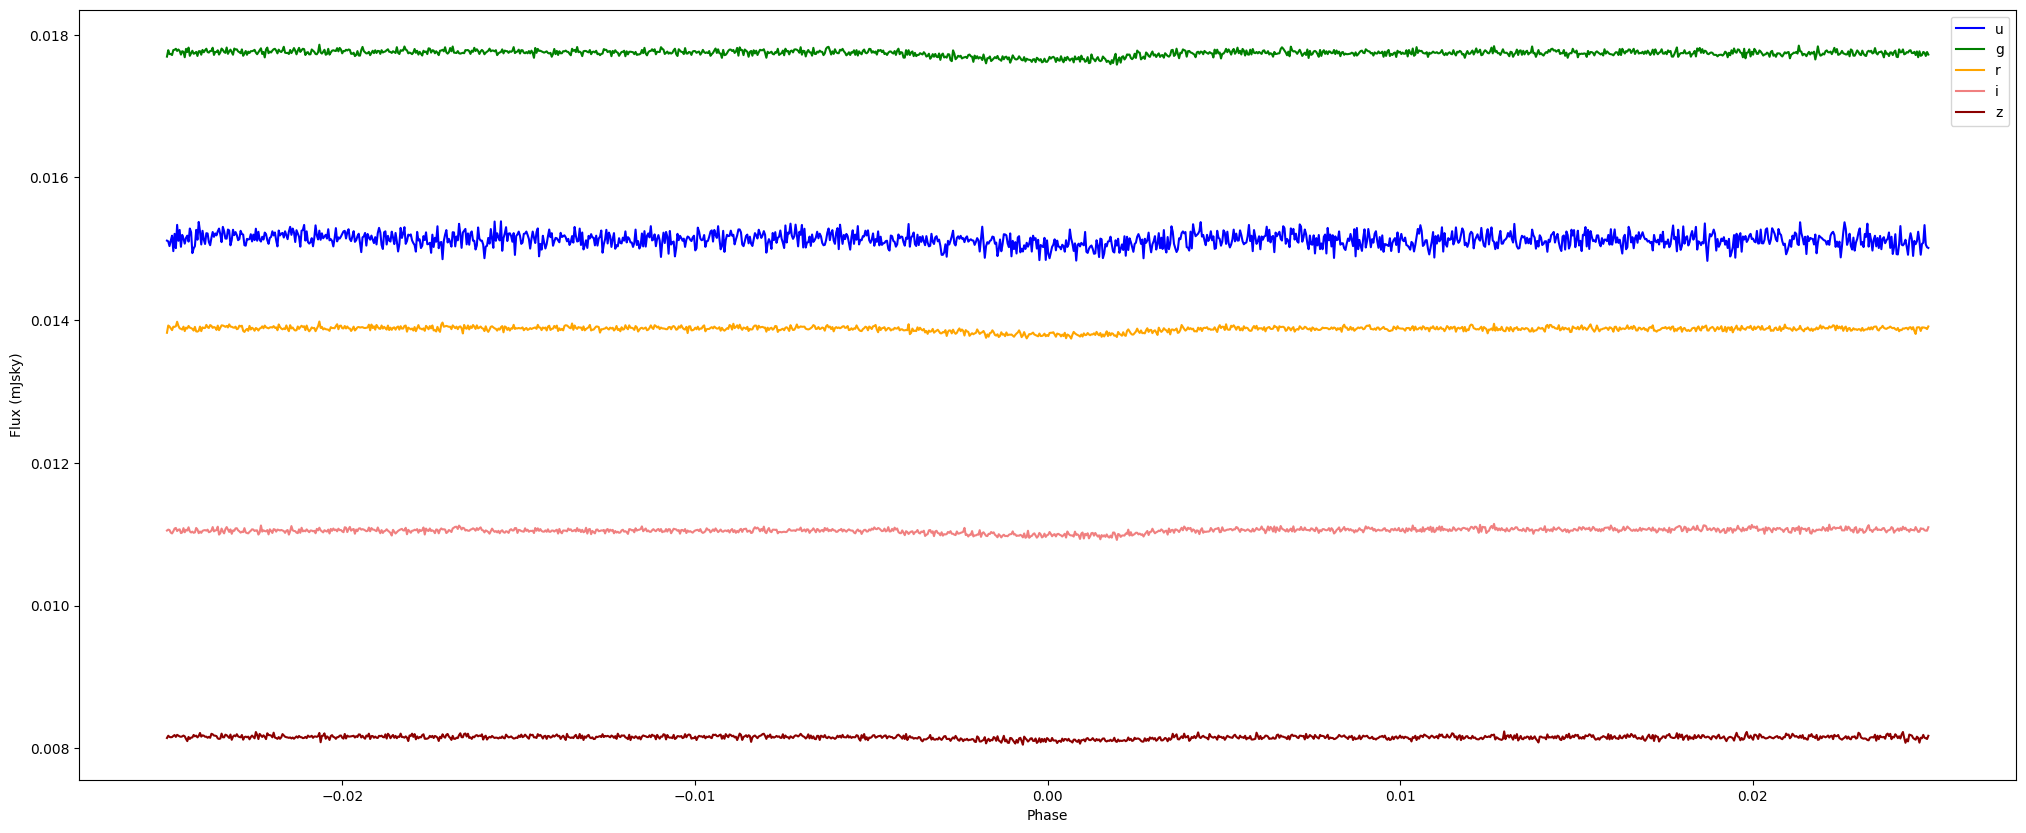

In [44]:
#plotting the flux calibrated lightcurves
bands = ['u', 'g', 'r', 'i', 'z']
colours = ['b', 'g', 'orange', 'lightcoral', 'darkred']

fig, ax = plt.subplots(figsize=(25, 10))

# Plot each band with its corresponding color and label
ax.plot(u_phase_clip,u_flux_resc_clip, color=colours[0], label=bands[0])
ax.plot(g_phase_clip, g_flux_resc_clip , color=colours[1], label=bands[1])
ax.plot(r_phase_clip, r_flux_resc_clip , color=colours[2], label=bands[2])
ax.plot(i_phase_clip, i_flux_resc_clip , color=colours[3], label=bands[3])
ax.plot(z_phase_clip, z_flux_resc_clip , color=colours[4], label=bands[4])



# Add labels and formatting
ax.set_xlabel('Phase')
ax.set_ylabel('Flux (mJsky)')

# Add a legend to distinguish the lines
ax.legend()

plt.show()

In [45]:
print(ph_col_z_clip)

[[-2.49762651e-02  3.56460187e-05  8.14305961e-03  2.00203982e-05
   1.00000000e+00  1.00000000e+00]
 [-2.49402513e-02  3.56460187e-05  8.17499443e-03  2.00420051e-05
   1.00000000e+00  1.00000000e+00]
 [-2.49042374e-02  3.56460187e-05  8.15756900e-03  1.99986103e-05
   1.00000000e+00  1.00000000e+00]
 ...
 [ 2.49029698e-02  3.56460187e-05  8.13928216e-03  2.18579784e-05
   1.00000000e+00  1.00000000e+00]
 [ 2.49389837e-02  3.56460187e-05  8.12862641e-03  2.28004616e-05
   1.00000000e+00  1.00000000e+00]
 [ 2.49749976e-02  3.56460187e-05  8.17393901e-03  2.30002731e-05
   1.00000000e+00  1.00000000e+00]]


np.savetxt(r'/home/pha19jgb/LCURVE/ph_udat0430.txt',ph_col_u_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/ph_gdat0430.txt',ph_col_g_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/ph_rdat0430.txt',ph_col_r_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/ph_idat0430.txt',ph_col_i_clip)
np.savetxt(r'/home/pha19jgb/LCURVE/ph_zdat0430.txt',ph_col_z_clip)